In [421]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

In [422]:
data = pd.read_csv("dados/Arquivo_NetFlix.csv", sep=',')
data['ano_add'] = data['date_added'].str[-4:].str.replace(',', '', regex=True)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ano_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


1. Qual é a proporção de filmes para programas de TV na base de dados?

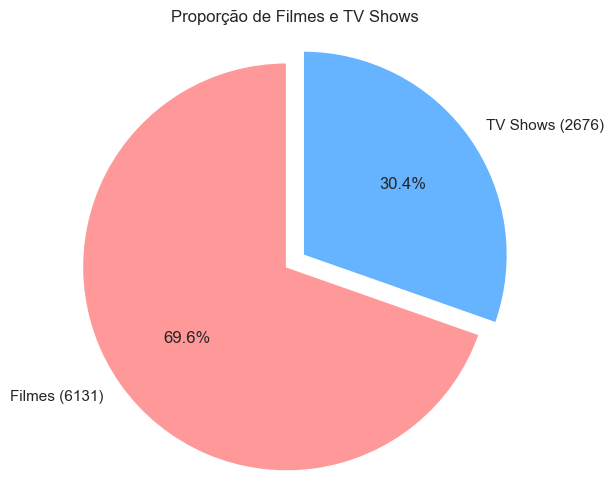

In [423]:
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

total_filmes = movies.shape[0]
total_tv_shows = tv_shows.shape[0]

dados = [total_filmes, total_tv_shows]
rotulos = [f'Filmes ({total_filmes})', f'TV Shows ({total_tv_shows})']

explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(dados, labels=rotulos, autopct='%1.1f%%', startangle=90, explode=explode, colors=['#FF9999', '#66B3FF'])
plt.axis('equal')
plt.title('Proporção de Filmes e TV Shows')

plt.show()

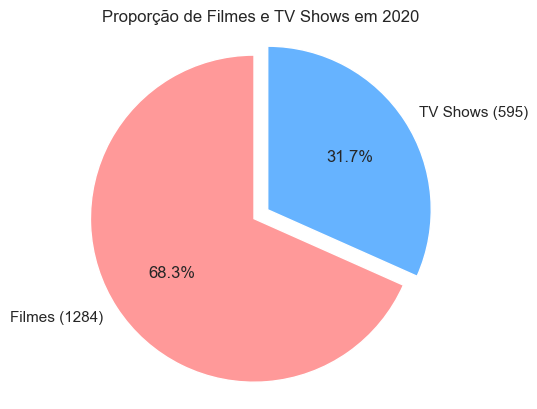

In [424]:
ano_selecionado = input("Digite o ano desejado: ")

data['date_added'] = data['date_added'].str.strip()

data['ano_add'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce').dt.year

data_filtrado = data[data['ano_add'] == int(ano_selecionado)]
total_filmes = data_filtrado[data_filtrado['type'] == 'Movie'].shape[0]
total_tv_shows = data_filtrado[data_filtrado['type'] == 'TV Show'].shape[0]

dados = [total_filmes, total_tv_shows]
rotulos = [f'Filmes ({total_filmes})', f'TV Shows ({total_tv_shows})']

explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(dados, labels=rotulos, autopct='%1.1f%%', startangle=90, explode=explode, colors=['#FF9999', '#66B3FF'])
ax.axis('equal')
plt.title(f'Proporção de Filmes e TV Shows em {ano_selecionado}')

plt.show()


2. Qual é o país que mais produz conteúdo na base de dados?

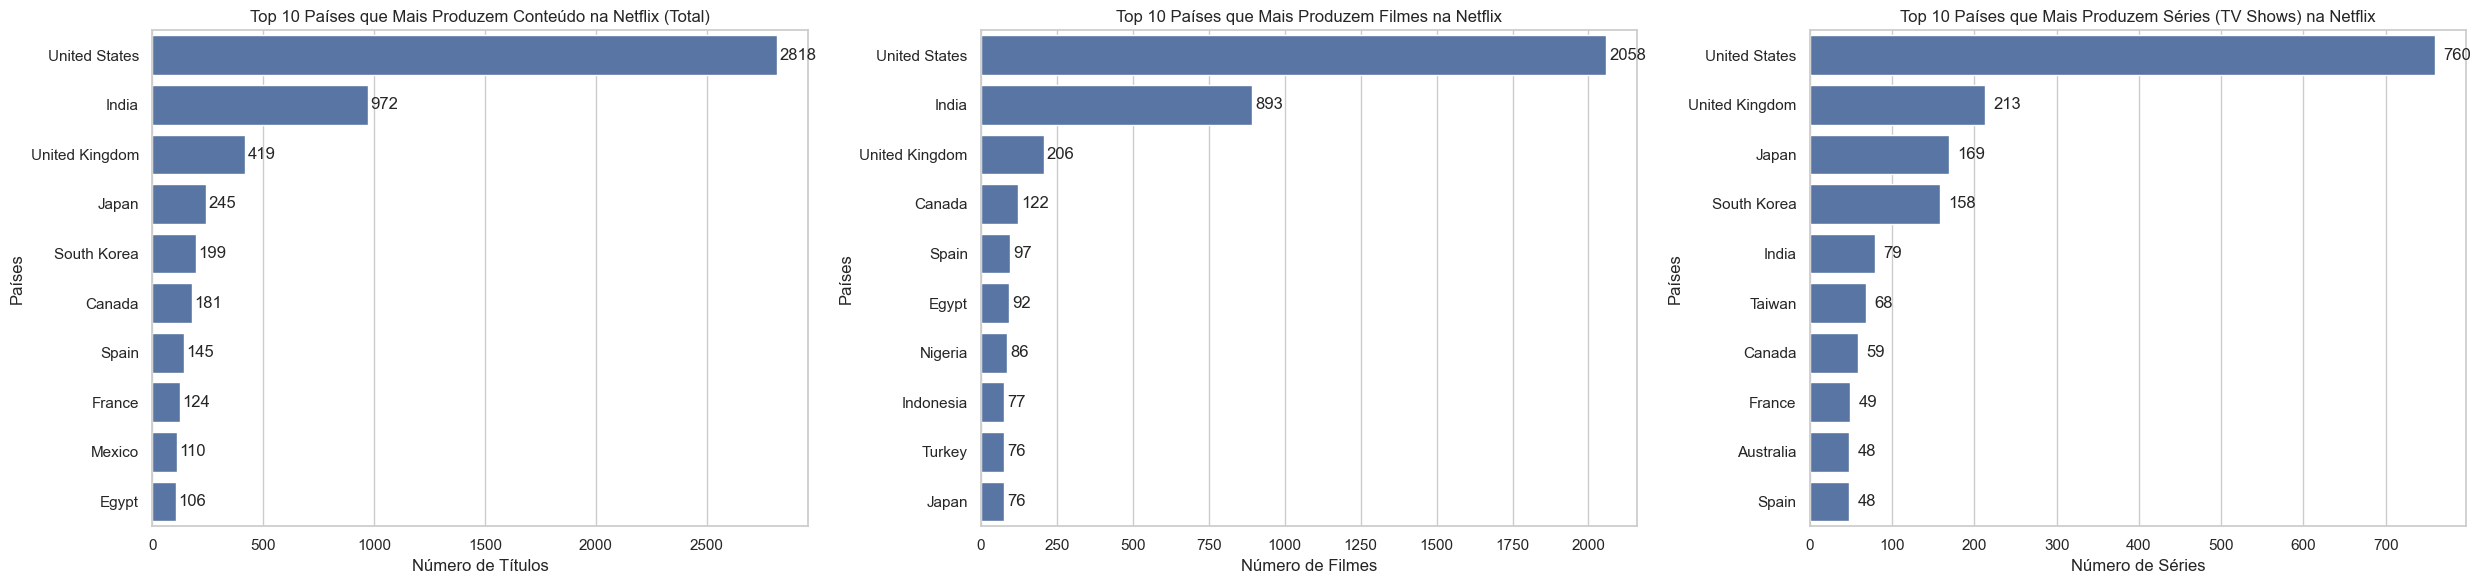

In [425]:
data = data.dropna(subset=['country'])

sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

top_10_countries_total = data['country'].value_counts().head(10)
sns.barplot(x=top_10_countries_total.values, y=top_10_countries_total.index, ax=axes[0])
axes[0].set_title('Top 10 Países que Mais Produzem Conteúdo na Netflix (Total)')
axes[0].set_xlabel('Número de Títulos')
axes[0].set_ylabel('Países')

for i, count in enumerate(top_10_countries_total.values):
    axes[0].text(count + 10, i, str(count), va='center')

top_10_countries_movies = data[data['type'] == 'Movie']['country'].value_counts().head(10)
sns.barplot(x=top_10_countries_movies.values, y=top_10_countries_movies.index, ax=axes[1])
axes[1].set_title('Top 10 Países que Mais Produzem Filmes na Netflix')
axes[1].set_xlabel('Número de Filmes')
axes[1].set_ylabel('Países')

for i, count in enumerate(top_10_countries_movies.values):
    axes[1].text(count + 10, i, str(count), va='center')

top_10_countries_tv_shows = data[data['type'] == 'TV Show']['country'].value_counts().head(10)
sns.barplot(x=top_10_countries_tv_shows.values, y=top_10_countries_tv_shows.index, ax=axes[2])
axes[2].set_title('Top 10 Países que Mais Produzem Séries (TV Shows) na Netflix')
axes[2].set_xlabel('Número de Séries')
axes[2].set_ylabel('Países')

for i, count in enumerate(top_10_countries_tv_shows.values):
    axes[2].text(count + 10, i, str(count), va='center')

plt.tight_layout()
plt.show()

3. Quais são os diretores mais frequentes na base de dados e quantos títulos eles têm?

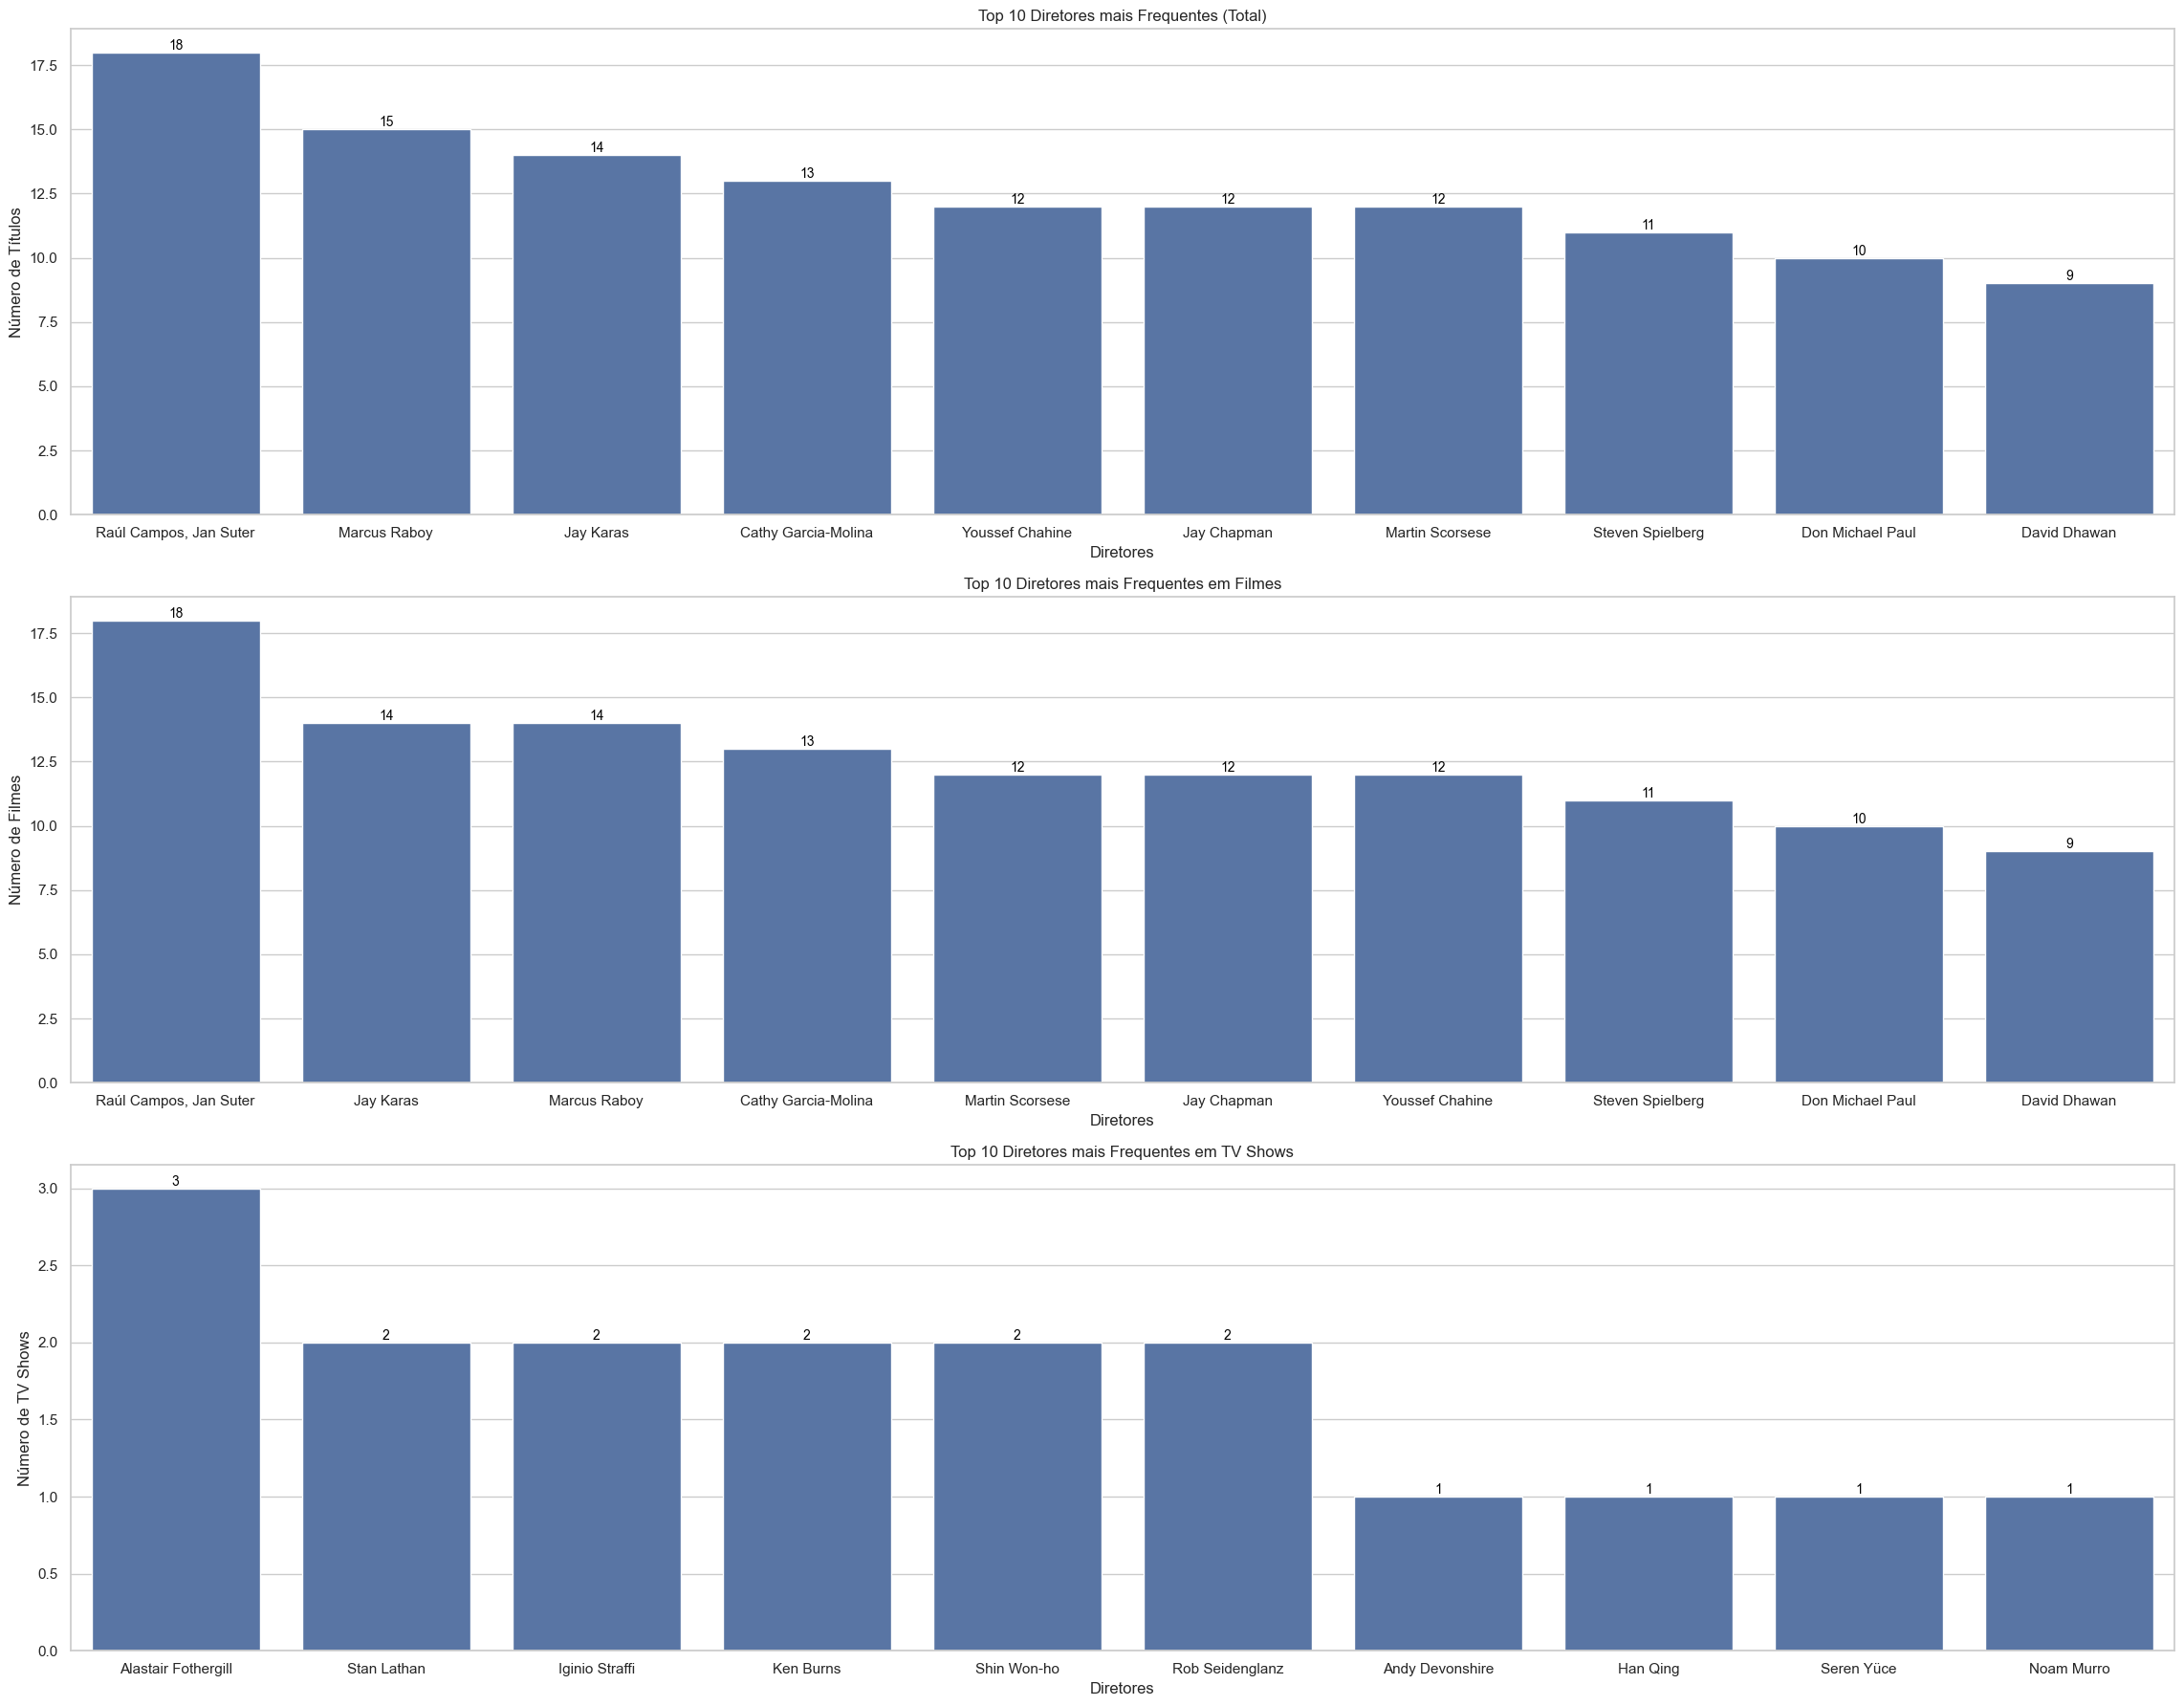

In [426]:
data = data.dropna(subset=['director'])

sns.set(style='whitegrid')

fig, axes = plt.subplots(3, 1, figsize=(23, 18))

def add_bar_numbers(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

top_directors_total = data['director'].value_counts().head(10)
ax = sns.barplot(x=top_directors_total.index, y=top_directors_total.values, ax=axes[0], legend=False)
axes[0].set_title('Top 10 Diretores mais Frequentes (Total)')
axes[0].set_xlabel('Diretores')
axes[0].set_ylabel('Número de Títulos')
add_bar_numbers(ax)

top_directors_movies = data[data['type'] == 'Movie']['director'].value_counts().head(10)
ax = sns.barplot(x=top_directors_movies.index, y=top_directors_movies.values, ax=axes[1], legend=False)
axes[1].set_title('Top 10 Diretores mais Frequentes em Filmes')
axes[1].set_xlabel('Diretores')
axes[1].set_ylabel('Número de Filmes')
add_bar_numbers(ax)

top_directors_tv_shows = data[data['type'] == 'TV Show']['director'].value_counts().head(10)
ax = sns.barplot(x=top_directors_tv_shows.index, y=top_directors_tv_shows.values, ax=axes[2], legend=False)
axes[2].set_title('Top 10 Diretores mais Frequentes em TV Shows')
axes[2].set_xlabel('Diretores')
axes[2].set_ylabel('Número de TV Shows')
add_bar_numbers(ax)

plt.tight_layout()
plt.show()

In [427]:
num_filmes_raul_jan = data[(data['type'] == 'Movie') & (data['director'] == 'Raúl Campos, Jan Suter')].shape[0]

print(f"Número de filmes dirigidos por Raúl Campos, Jan Suter: {num_filmes_raul_jan}")

Número de filmes dirigidos por Raúl Campos, Jan Suter: 18


4. Como a quantidade de novos títulos adicionados à Netflix tem mudado ao longo dos anos?

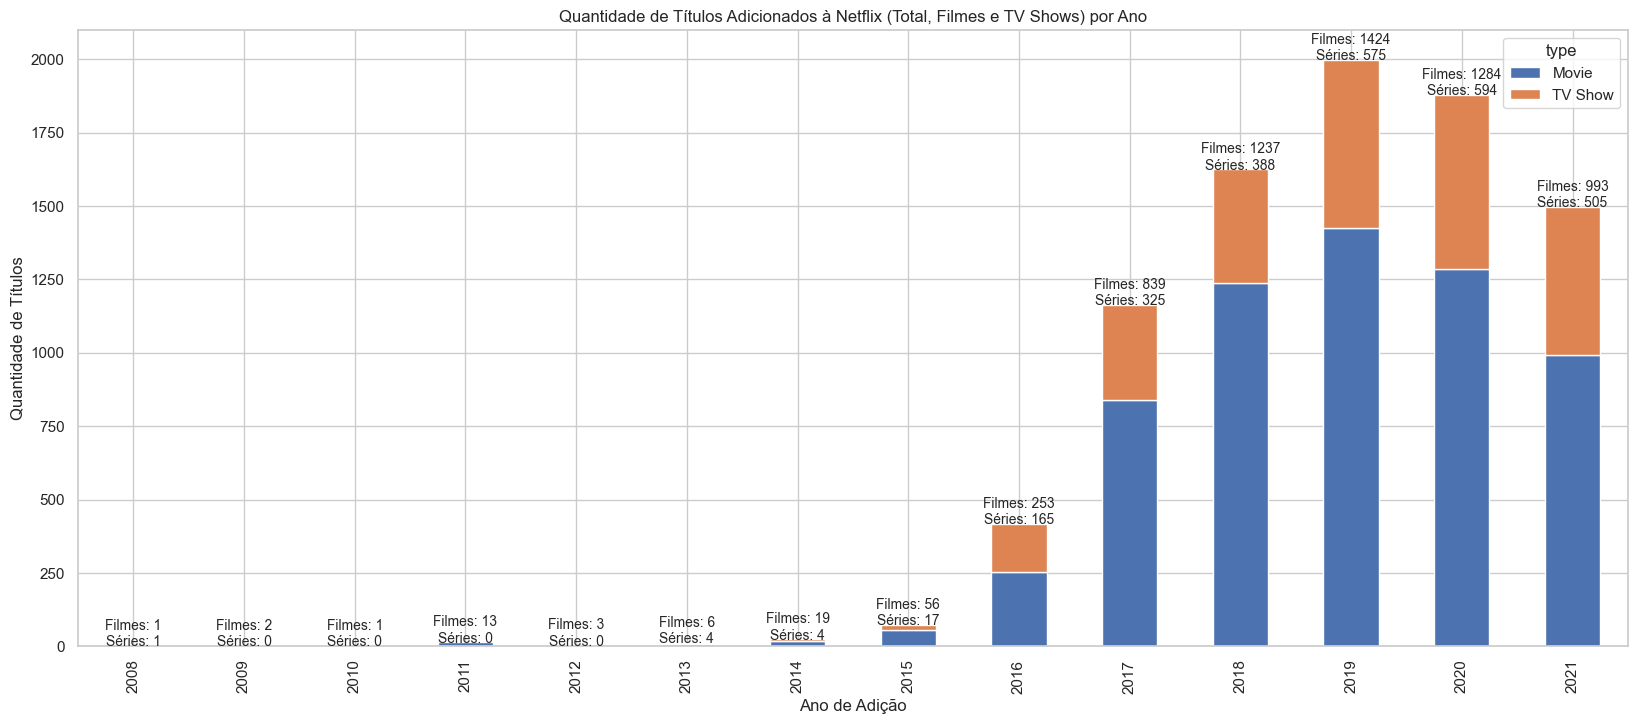

In [428]:
data = pd.read_csv("dados/Arquivo_NetFlix.csv", sep=',')
data['ano_add'] = data['date_added'].str[-4:].str.replace(',', '', regex=True)

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data['ano_add'] = data['date_added'].dt.year

grouped_data = data.groupby(['ano_add', 'type']).size().unstack()

grouped_data = grouped_data.fillna(0)

fig, ax = plt.subplots(figsize=(20, 8))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Ano de Adição')
ax.set_ylabel('Quantidade de Títulos')

ax.set_title('Quantidade de Títulos Adicionados à Netflix (Total, Filmes e TV Shows) por Ano')

for i, year in enumerate(grouped_data.index):
    total_filmes = int(grouped_data.loc[year, 'Movie'])
    total_tv_shows = int(grouped_data.loc[year, 'TV Show'])
    ax.text(i, total_filmes + total_tv_shows, f'Filmes: {total_filmes}\nSéries: {total_tv_shows}', ha='center', fontsize=10)

ax.set_xticklabels(grouped_data.index.astype(int))

plt.show()


In [429]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['mes_add'] = data['date_added'].dt.strftime('%B')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ano_add,mes_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January


5. Existe uma tendência em termos de quando durante o ano os títulos são adicionados à Netflix?

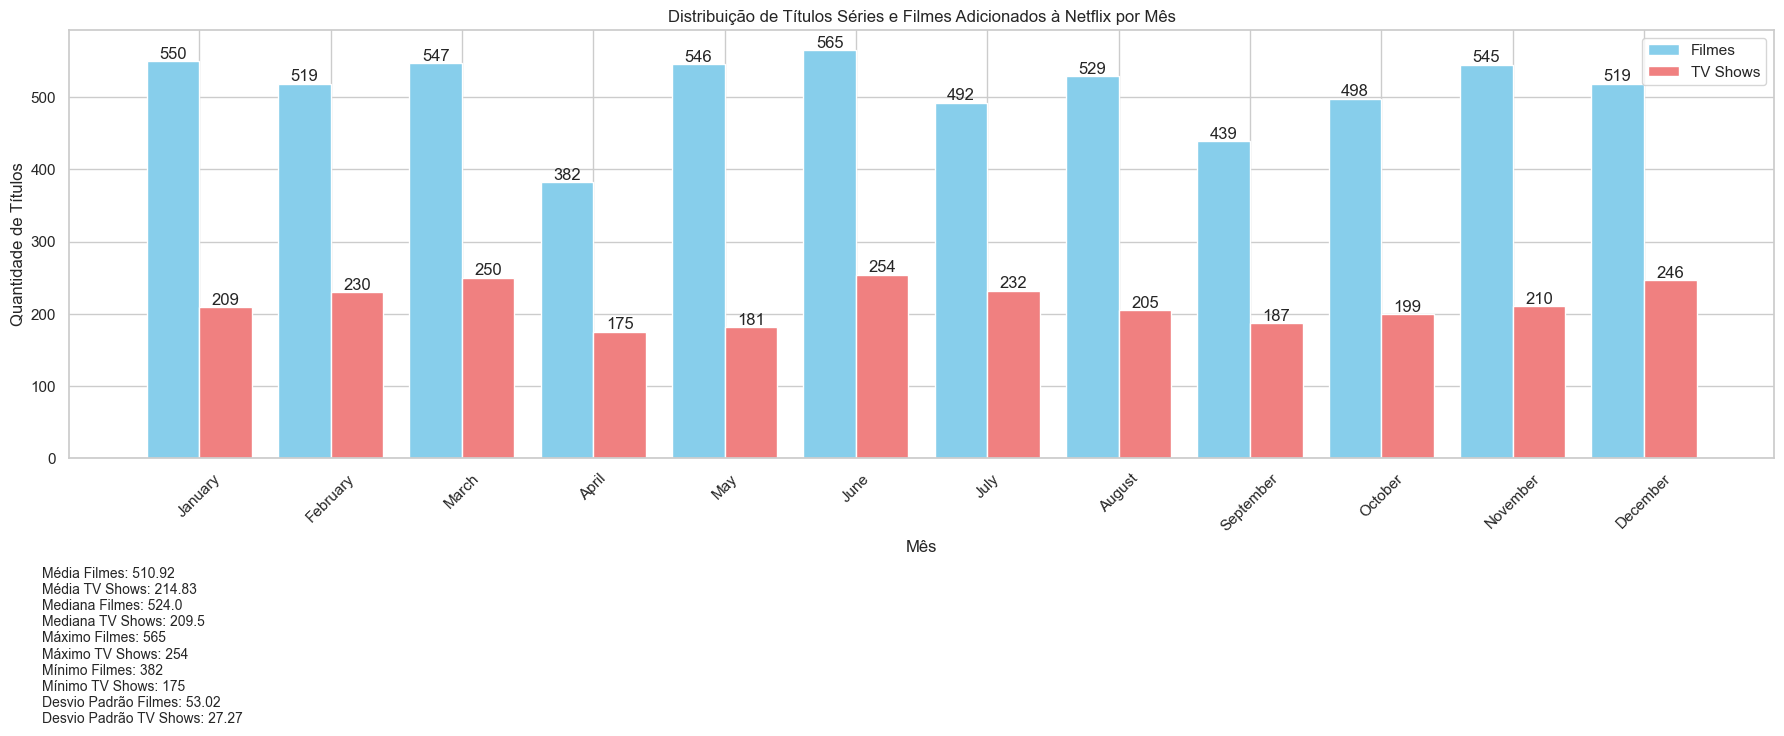

In [430]:
tv_shows = data[data['type'] == 'TV Show']
movies = data[data['type'] == 'Movie']

contagem_tv_shows = tv_shows['mes_add'].value_counts().sort_index()
contagem_movies = movies['mes_add'].value_counts().sort_index()

media_filmes_por_mes = contagem_movies.mean()
media_tv_shows_por_mes = contagem_tv_shows.mean()

mediana_filmes = np.median(contagem_movies)
mediana_tv_shows = np.median(contagem_tv_shows)

plt.figure(figsize=(18, 8))
bar_width = 0.4
bar_positions = range(1, 13)

plt.bar(bar_positions, contagem_movies.values, bar_width, color='skyblue', label='Filmes')
plt.bar([pos + bar_width for pos in bar_positions], contagem_tv_shows.values, bar_width, color='lightcoral', label='TV Shows')

plt.title('Distribuição de Títulos Séries e Filmes Adicionados à Netflix por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Títulos')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], calendar.month_name[1:13], rotation=45)

plt.legend(loc='upper right')

for i, count in enumerate(bar_positions):
    plt.text(count, contagem_movies.values[i], str(contagem_movies.values[i]), ha='center', va='bottom')
    plt.text(count + bar_width, contagem_tv_shows.values[i], str(contagem_tv_shows.values[i]), ha='center', va='bottom')

estatisticas_texto = f'Média Filmes: {media_filmes_por_mes:.2f}\n' \
                    f'Média TV Shows: {media_tv_shows_por_mes:.2f}\n' \
                    f'Mediana Filmes: {mediana_filmes}\n' \
                    f'Mediana TV Shows: {mediana_tv_shows}\n' \
                    f'Máximo Filmes: {contagem_movies.max()}\n' \
                    f'Máximo TV Shows: {contagem_tv_shows.max()}\n' \
                    f'Mínimo Filmes: {contagem_movies.min()}\n' \
                    f'Mínimo TV Shows: {contagem_tv_shows.min()}\n' \
                    f'Desvio Padrão Filmes: {contagem_movies.std():.2f}\n' \
                    f'Desvio Padrão TV Shows: {contagem_tv_shows.std():.2f}'

plt.text(0, -150, estatisticas_texto, fontsize=10, va='top', ha='left')
plt.tight_layout()
plt.show()
